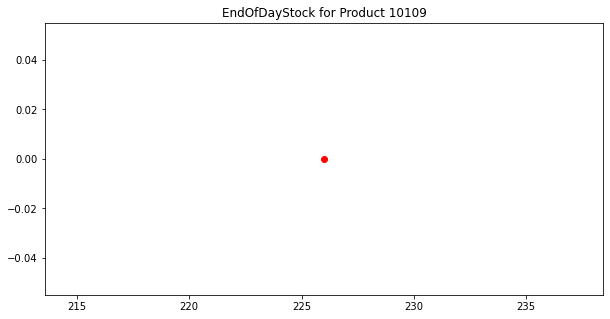

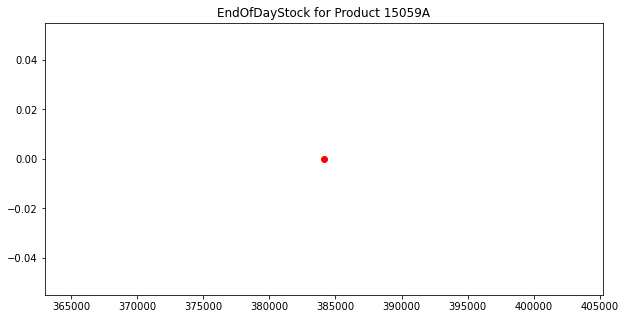

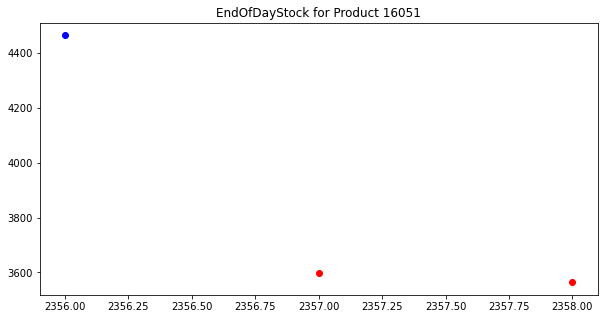

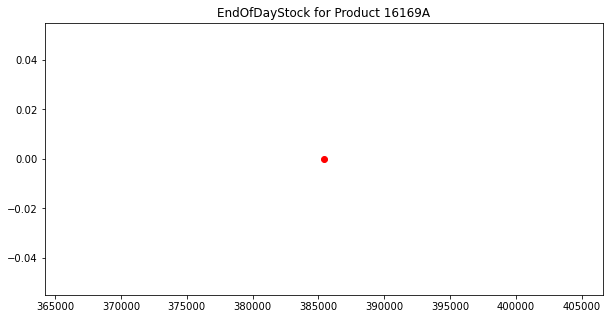

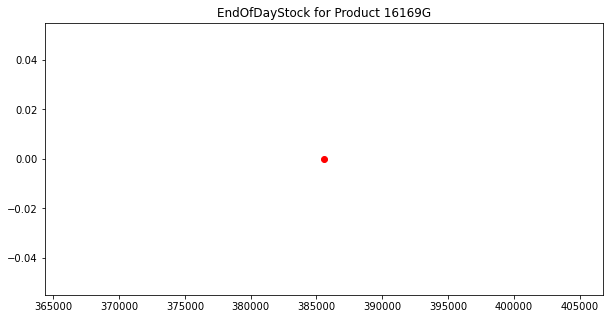

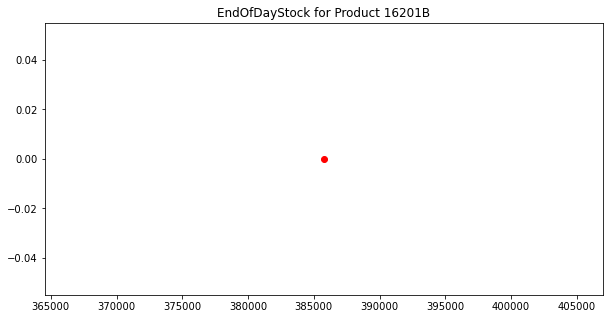

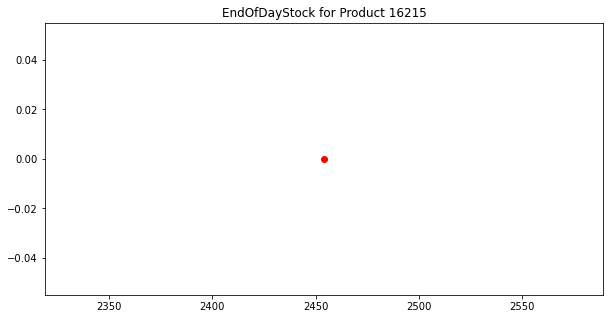

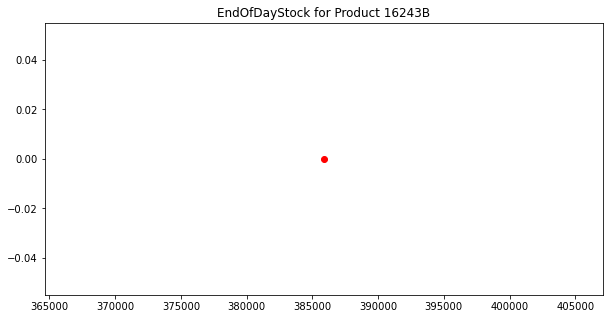

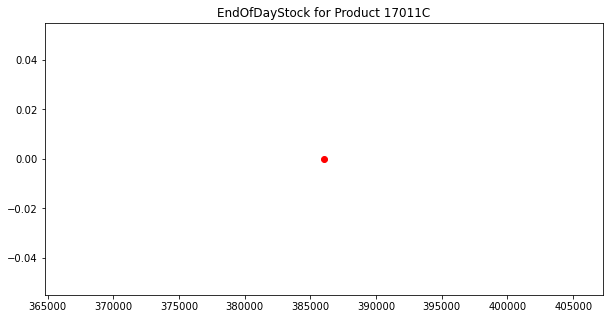

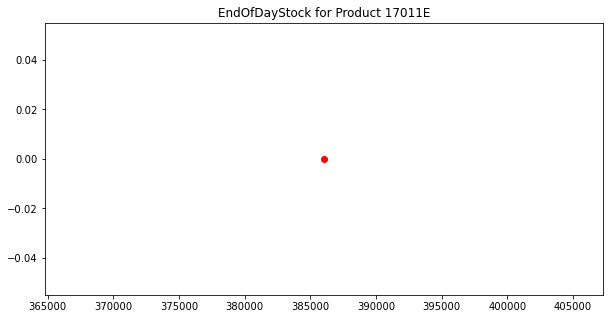

KeyError: "None of [Index(['Product_ID', 'Anomaly'], dtype='object', name='Product_ID')] are in the [index]"

In [25]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
data = pd.read_excel('sales_and_eodStocks.xlsx')

data['Date'] = pd.to_datetime(data['Date'])

# Convert 'Product_ID' column to string
data['Product_ID'] = data['Product_ID'].astype(str)
clf = IsolationForest(contamination=0.01)

for product_id in data['Product_ID'].unique():
    product_data = data[data['Product_ID'] == product_id][['EndOfDayStock']].to_numpy()
    clf.fit(product_data)
    anomalies = clf.predict(product_data)

   # Add the anomaly labels to the original data
    data.loc[data['Product_ID'] == product_id, 'Anomaly'] = anomalies
    
anomaly_counts = data.groupby('Product_ID')['Anomaly'].sum()
top_10_products = anomaly_counts.ngreatest(10)

for product_id in top_10_products.index:
    group = data[data['Product_ID'] == product_id]
    plt.figure(figsize=(10, 5))

    plt.scatter(group.index[group['Anomaly'] == 1], group['EndOfDayStock'][group['Anomaly'] == 1], color='red')
    plt.scatter(group.index[group['Anomaly'] == -1], group['EndOfDayStock'][group['Anomaly'] == -1], color='blue')
    plt.title(f'EndOfDayStock for Product {product_id}')

    plt.show()
    
top_10_anomalies = top_10_products[['Product_ID', 'Anomaly']]

# Group by 'Product_ID' and sum the 'Anomaly' column
top_10_anomalies_sum = top_10_anomalies.groupby('Product_ID')['Anomaly'].sum()

# Convert the DataFrame to JSON
json_string = top_10_anomalies_sum.to_json(orient='records')
top_10_anomalies_sum.to_json('top_10_anomaly_products.json', orient='records')